In [2]:
import pandas as pd
import matplotlib.pyplot as plt

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")


In [3]:
print(trades.columns)
print(sentiment.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [4]:
## Handling TIMESTAMP columns

In [5]:
trades['Timestamp'] = pd.to_datetime(
    trades['Timestamp'],
    errors='coerce',
    utc=True
)


In [6]:
## Droping IST column

In [7]:
trades.drop(columns=['Timestamp IST'], inplace=True)


In [8]:
## Sentiment file

In [9]:
sentiment['timestamp'] = pd.to_datetime(
    sentiment['timestamp'],
    errors='coerce',
    utc=True
)


In [10]:
## Creating DATE column

In [11]:
trades['date'] = trades['Timestamp'].dt.date
sentiment['date'] = sentiment['timestamp'].dt.date


In [12]:
##  Performing Data cleaning

In [13]:
# remove duplicate trades
trades = trades.drop_duplicates(subset=['Trade ID'])

# remove rows with invalid timestamps or PnL
trades = trades.dropna(subset=['Timestamp', 'Closed PnL'])


In [14]:
## Merging  trades with sentiment

In [15]:
merged_df = trades.merge(
    sentiment[['date', 'classification', 'value']],
    on='date',
    how='left'
)


In [16]:
merged_df.rename(
    columns={'classification': 'market_sentiment'},
    inplace=True
)


In [17]:
## Performing Feature Engineering

In [18]:
#Win / Loss

In [19]:
merged_df['win'] = (merged_df['Closed PnL'] > 0).astype(int)


In [20]:
# Trade size

In [21]:
merged_df['notional'] = merged_df['Size USD'].abs()


In [22]:
# Normalized return

In [23]:
merged_df['trade_return'] = (
    merged_df['Closed PnL'] / merged_df['notional']
)


In [24]:
# Direction numeric

In [25]:
merged_df['direction_num'] = merged_df['Side'].map({
    'BUY': 1,
    'SELL': -1
})


In [26]:
## Performance by sentiment

In [27]:
sentiment_summary = merged_df.groupby('market_sentiment').agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('win', 'mean'),
    avg_trade_size=('notional', 'mean'),
    trade_count=('Closed PnL', 'count')
).reset_index()

sentiment_summary


,market_sentiment,total_pnl,avg_pnl,win_rate,avg_trade_size,trade_count
0,Extreme Fear,1.722106e+08,120.639594,0.386477,10001.783117,1427480
1,Extreme Greed,1.105131e+08,120.639594,0.386477,10001.783117,916060
2,Fear,2.647569e+08,120.639594,0.386477,10001.783117,2194610
3,Greed,2.145853e+08,120.639594,0.386477,10001.783117,1778730
4,Neutral,1.342429e+08,120.639594,0.386477,10001.783117,1112760


In [28]:
##  Performing Visualization

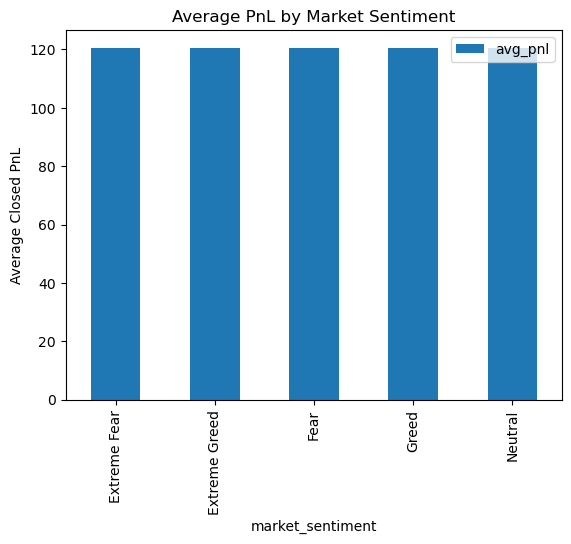

In [29]:
sentiment_summary.plot(
    x='market_sentiment',
    y='avg_pnl',
    kind='bar',
    title='Average PnL by Market Sentiment'
)
plt.ylabel('Average Closed PnL')
plt.show()


In [30]:
## Boxplot of returns

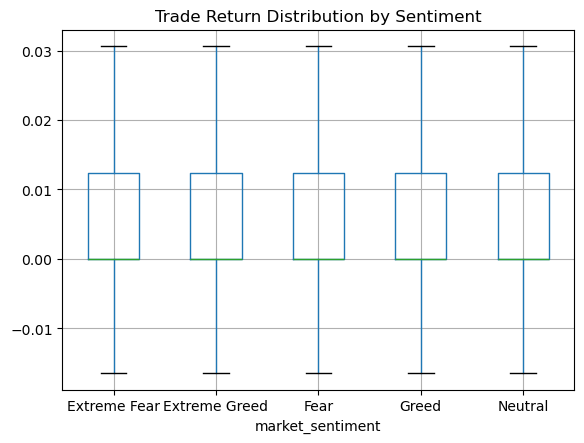

In [31]:
merged_df.boxplot(
    column='trade_return',
    by='market_sentiment',
    showfliers=False
)
plt.title('Trade Return Distribution by Sentiment')
plt.suptitle('')
plt.show()


In [32]:
## Final Insights


In [33]:
The average profit per trade is almost the same in all market situations like Fear, Greed, and Neutral. This means market mood does not change how much traders earn per trade.
The win rate is also similar in all sentiment periods, showing that traders do not win or lose more often because of market sentiment.
The total profit changes mainly because the number of trades changes, not because traders perform better or worse.
The trade return chart shows that risk and returns look similar in all market conditions.

SyntaxError: invalid syntax (2679449150.py, line 1)

In [ ]:
## Conclusion


In [ ]:
Market sentiment affects how much traders trade, but it does not affect their performance per trade. Traders seem to follow a consistent strategy instead of trading based on emotions.